In [1]:
#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
train = pd.read_csv('AirPassengers.csv')
train.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#preprocessing
train.timestamp = pd.to_datetime(train.Month , format = '%Y-%m')
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
train.head()

C:\Users\irfan\AppData\Local\Temp\ipykernel_27820\3141898430.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.timestamp = pd.to_datetime(train.Month , format = '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Methods to Check Stationarity

The next step is to determine whether a given series is stationary or not and deal with it accordingly. This section looks at some common methods which we can use to perform this check.

### Visual test

Consider the plots we used in the previous section. We were able to identify the series in which mean and variance were changing with time, simply by looking at each plot. Similarly, we can plot the data and determine if the properties of the series are changing with time or not.

<Axes: xlabel='Month'>

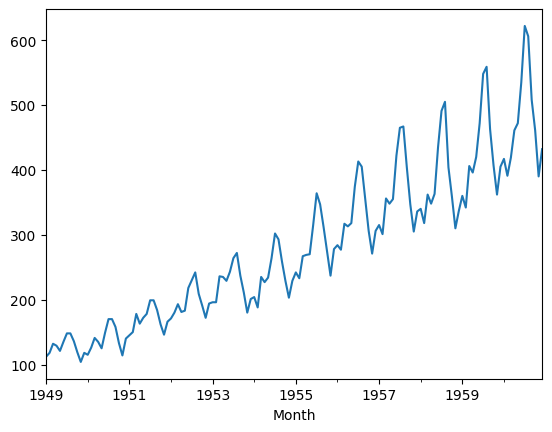

In [4]:
train['#Passengers'].plot()

Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.

### Statistical test

Instead of going for the visual test, we can use statistical tests like the unit root stationary tests. Unit root indicates that the statistical properties of a given series are not constant with time, which is the condition for stationary time series. Here is the mathematics explanation of the same :
Suppose we have a time series :

                                                yt = a*yt-1 + ε t

where yt is the value at the time instant t and ε t is the error term. In order to calculate yt we need the value of yt-1, which is :

                                                yt-1 = a*yt-2 + ε t-1

If we do that for all observations, the value of yt will come out to be:

                                                yt = an*yt-n + Σεt-i*ai

If the value of a is 1 (unit) in the above equation, then the predictions will be equal to the yt-n and sum of all errors from t-n to t, which means that the variance will increase with time. This is knows as unit root in a time series. We know that for a stationary time series, the variance must not be a function of time. The unit root tests check the presence of unit root in the series by checking if value of a=1. Below are the two of the most commonly used unit root stationary tests:

#### ADF (Augmented Dickey Fuller) Test
The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

In [5]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
#apply adf test on the series
adf_test(train['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Results of ADF test: The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals. 

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

####  KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [6]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [7]:
#apply kpss test on the series
kpss_test(train['#Passengers'])

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\irfan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

I usually perform both the statistical tests before I prepare a model for my time series data. It once happened that both the tests showed contradictory results. One of the tests showed that the series is stationary while the other showed that the series is not! I got stuck at this part for hours, trying to figure out how is this possible. As it turns out, there are more than one type of stationarity.

So in summary, the ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.

### Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

- Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

- Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

- Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.
It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

        Case 1: Both tests conclude that the series is not stationary -> series is not stationary
        Case 2: Both tests conclude that the series is stationary -> series is stationary
        Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
        Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

### Making a Time Series Stationary

#### Differencing
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

                                        yt‘ = yt – y(t-1)

where yt is the value at a time t

Applying differencing on our series and plotting the results:

<Axes: xlabel='Month'>

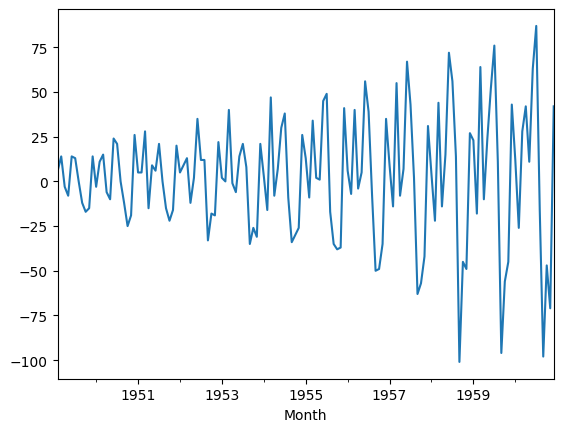

In [8]:
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
train['#Passengers_diff'].dropna().plot()

#### Seasonal Differencing
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

n=7
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(n)

#### Transformation
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

<Axes: xlabel='Month'>

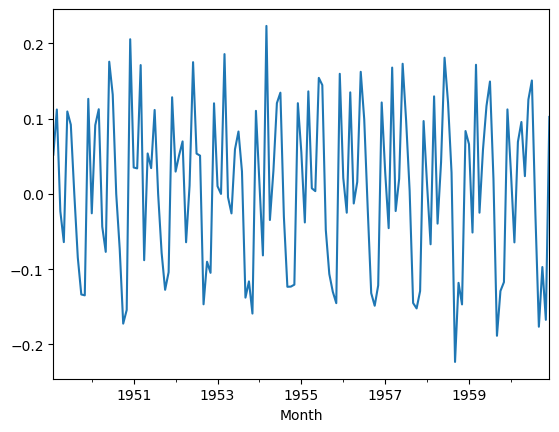

In [10]:
import numpy as np
train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot()


As you can see, this plot is a significant improvement over the previous plots. You can use square root or power transformation on the series and see if they come up with better results. 